# Quintiles vs Full Spectrum Contrarian Strategy Comparison

**Objective**: Compare two versions of the monthly contrarian strategy:

1. **Quintiles Strategy** (Traditional): Long bottom 20%, short top 20%, neutral on middle 60%
2. **Full Spectrum Strategy** (All-in): Long bottom 50%, short top 50%, no neutral positions

**Analysis Framework**:
- 6-month lookback period for ranking commodities
- Monthly rebalancing
- Equal weighting within each group
- Comprehensive performance and risk analysis

---

In [1]:
# Imports and setup
import sys
import os
sys.path.append('../modules')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Custom modules
from data_loader import load_commodity_data
from monthly_strategy import prepare_monthly_data
from monthly_strategy_comparison import (
    run_strategy_comparison,
    create_comparison_visualizations,
    print_detailed_comparison_table
)

# Plot styling
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✓ Imports successful")
print(f"✓ Working directory: {os.getcwd()}")

✓ Imports successful
✓ Working directory: /Users/edoardocamerinelli/Desktop/momentum_contrarian_unified/approaches/vectorized_contrarian_monthly/notebooks


## 1. Data Loading and Preparation

Loading commodity futures data and preparing monthly price series for analysis.

In [2]:
# Load commodity data
print("Loading commodity futures data...")
commodity_data = load_commodity_data()

print(f"✓ Loaded {len(commodity_data)} commodities")
print(f"✓ Commodities: {list(commodity_data.keys())}")

# Convert to monthly data
print("\nConverting to monthly frequency...")
monthly_prices = prepare_monthly_data(commodity_data)

print(f"✓ Monthly data shape: {monthly_prices.shape}")
print(f"✓ Date range: {monthly_prices.index.min().strftime('%Y-%m')} to {monthly_prices.index.max().strftime('%Y-%m')}")
print(f"✓ Available months: {len(monthly_prices)} months")

Loading commodity futures data...
✓ Loaded CL=F: 6266 records
✓ Loaded NG=F: 6263 records
✓ Loaded BZ=F: 4484 records
✓ Loaded RB=F: 6221 records
✓ Loaded HO=F: 6260 records
✓ Loaded GC=F: 6257 records
✓ Loaded SI=F: 6259 records
✓ Loaded PA=F: 5980 records
✓ Loaded HG=F: 6262 records
✓ Loaded PL=F: 5741 records
✓ Loaded ZC=F: 6269 records
✓ Loaded ZW=F: 6281 records
✓ Loaded ZS=F: 6261 records
✓ Loaded ZM=F: 6272 records
✓ Loaded ZL=F: 6310 records
✓ Loaded ZO=F: 6272 records
✓ Loaded LE=F: 6124 records
✓ Loaded HE=F: 6192 records
✓ Loaded GF=F: 6094 records
✓ Loaded SB=F: 6380 records
✓ Loaded CT=F: 6419 records
✓ Loaded CC=F: 6419 records
✓ Loaded KC=F: 6417 records
✓ Loaded OJ=F: 5995 records

Loaded 24 commodity datasets
✓ Loaded 24 commodities
✓ Commodities: ['CL=F', 'NG=F', 'BZ=F', 'RB=F', 'HO=F', 'GC=F', 'SI=F', 'PA=F', 'HG=F', 'PL=F', 'ZC=F', 'ZW=F', 'ZS=F', 'ZM=F', 'ZL=F', 'ZO=F', 'LE=F', 'HE=F', 'GF=F', 'SB=F', 'CT=F', 'CC=F', 'KC=F', 'OJ=F']

Converting to monthly frequency

In [3]:
# Quick data preview
print("Monthly Price Data Preview:")
print(monthly_prices.tail())

print("\nData Quality Check:")
print(f"Missing values per commodity:")
missing_data = monthly_prices.isnull().sum()
print(missing_data[missing_data > 0])

if len(missing_data[missing_data > 0]) == 0:
    print("✓ No missing data found")

Monthly Price Data Preview:
Ticker           CL=F   NG=F       BZ=F    RB=F    HO=F         GC=F  \
Date                                                                   
2025-04-30  58.209999  3.326  63.119999  2.0370  2.0367  3305.000000   
2025-05-31  60.790001  3.447  63.900002  2.0384  2.0172  3288.899902   
2025-06-30  65.110001  3.456  67.610001  2.0798  2.3458  3294.399902   
2025-07-31  69.260002  3.106  72.529999  2.2156  2.3995  3293.199951   
2025-08-31  63.880001  3.067  66.430000  2.0775  2.2668  3400.300049   

Ticker           SI=F         PA=F    HG=F         PL=F  ...       ZL=F  \
Date                                                     ...              
2025-04-30  32.530998   930.200012  4.5600   963.799988  ...  48.580002   
2025-05-31  32.891998   961.299988  4.6525  1051.699951  ...  46.889999   
2025-06-30  35.852001  1102.099976  5.0300  1334.000000  ...  52.509998   
2025-07-31  36.551998  1196.099976  4.3305  1286.400024  ...  55.580002   
2025-08-31  38.15

## 2. Strategy Comparison Analysis

Running both strategies with 6-month lookback and comparing performance.

In [4]:
# Set analysis parameters
LOOKBACK_MONTHS = 6

print(f"Running strategy comparison with {LOOKBACK_MONTHS} months lookback...")
print("="*60)

# Run comprehensive comparison
results_dict, metrics_dict, positions_analysis = run_strategy_comparison(
    monthly_prices, 
    lookback_months=LOOKBACK_MONTHS
)

print("✓ Strategy comparison completed")
print(f"✓ Quintiles strategy periods: {len(results_dict['quintiles'])}")
print(f"✓ Full spectrum strategy periods: {len(results_dict['full_spectrum'])}")

Running strategy comparison with 6 months lookback...
Running strategy comparison with 6 months lookback...
✓ Strategy comparison completed
✓ Quintiles strategy periods: 308
✓ Full spectrum strategy periods: 308


## 3. Quick Results Summary

High-level comparison of key performance metrics.

In [5]:
# Create summary comparison table
summary_data = {
    'Metric': ['Total Return', 'Annual Return', 'Sharpe Ratio', 'Max Drawdown', 'Win Rate'],
    'Quintiles Strategy': [
        f"{metrics_dict['quintiles']['total_return']:.1%}",
        f"{metrics_dict['quintiles']['annual_return']:.1%}",
        f"{metrics_dict['quintiles']['sharpe_ratio']:.3f}",
        f"{metrics_dict['quintiles']['max_drawdown']:.1%}",
        f"{metrics_dict['quintiles']['win_rate']:.1%}"
    ],
    'Full Spectrum Strategy': [
        f"{metrics_dict['full_spectrum']['total_return']:.1%}",
        f"{metrics_dict['full_spectrum']['annual_return']:.1%}",
        f"{metrics_dict['full_spectrum']['sharpe_ratio']:.3f}",
        f"{metrics_dict['full_spectrum']['max_drawdown']:.1%}",
        f"{metrics_dict['full_spectrum']['win_rate']:.1%}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("QUICK PERFORMANCE COMPARISON")
print("="*50)
print(summary_df.to_string(index=False))

# Quick winner analysis
print("\n" + "="*50)
print("QUICK WINNER ANALYSIS:")
print("="*50)

if metrics_dict['quintiles']['sharpe_ratio'] > metrics_dict['full_spectrum']['sharpe_ratio']:
    print(f"🏆 SHARPE RATIO WINNER: Quintiles Strategy ({metrics_dict['quintiles']['sharpe_ratio']:.3f} vs {metrics_dict['full_spectrum']['sharpe_ratio']:.3f})")
else:
    print(f"🏆 SHARPE RATIO WINNER: Full Spectrum Strategy ({metrics_dict['full_spectrum']['sharpe_ratio']:.3f} vs {metrics_dict['quintiles']['sharpe_ratio']:.3f})")

if metrics_dict['quintiles']['total_return'] > metrics_dict['full_spectrum']['total_return']:
    print(f"📈 TOTAL RETURN WINNER: Quintiles Strategy ({metrics_dict['quintiles']['total_return']:.1%} vs {metrics_dict['full_spectrum']['total_return']:.1%})")
else:
    print(f"📈 TOTAL RETURN WINNER: Full Spectrum Strategy ({metrics_dict['full_spectrum']['total_return']:.1%} vs {metrics_dict['quintiles']['total_return']:.1%})")

QUICK PERFORMANCE COMPARISON
       Metric Quintiles Strategy Full Spectrum Strategy
 Total Return            3223.0%                 285.3%
Annual Return              14.6%                   5.4%
 Sharpe Ratio              0.507                  0.330
 Max Drawdown             -37.7%                 -25.5%
     Win Rate              52.3%                  52.3%

QUICK WINNER ANALYSIS:
🏆 SHARPE RATIO WINNER: Quintiles Strategy (0.507 vs 0.330)
📈 TOTAL RETURN WINNER: Quintiles Strategy (3223.0% vs 285.3%)


## 4. Comprehensive Visualizations

Detailed charts comparing equity curves and performance metrics.

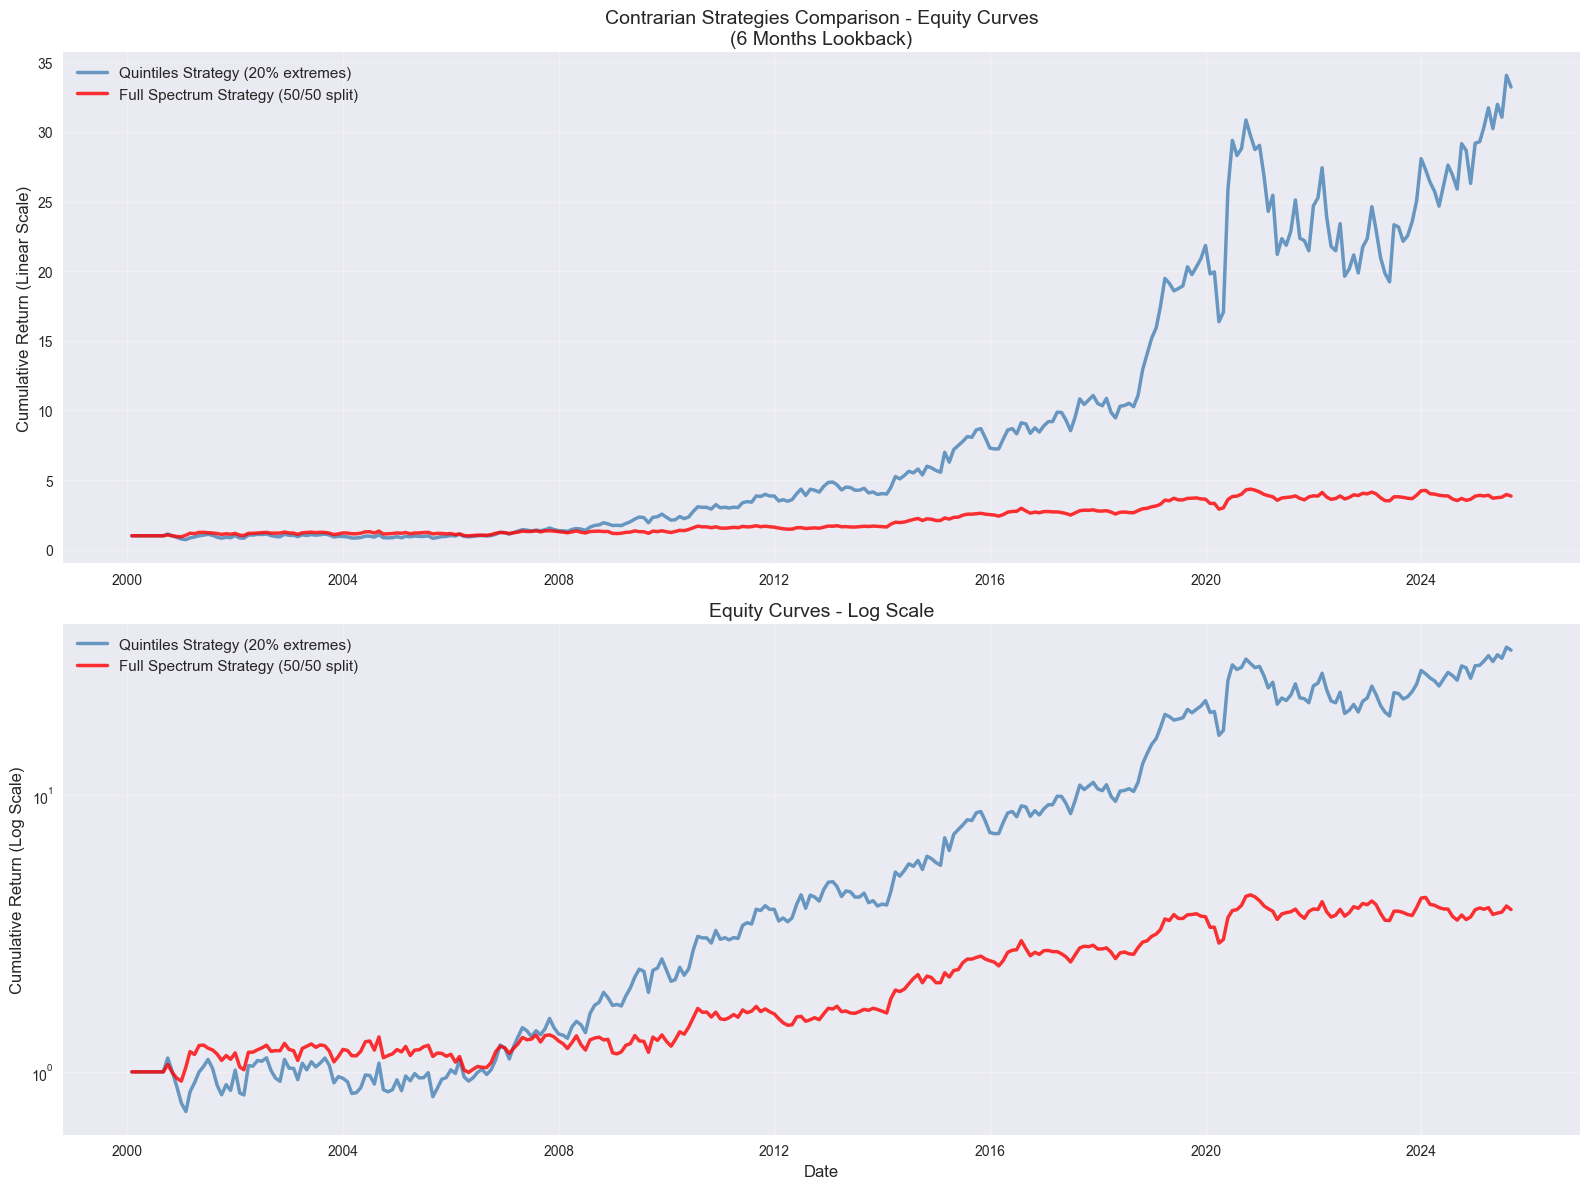

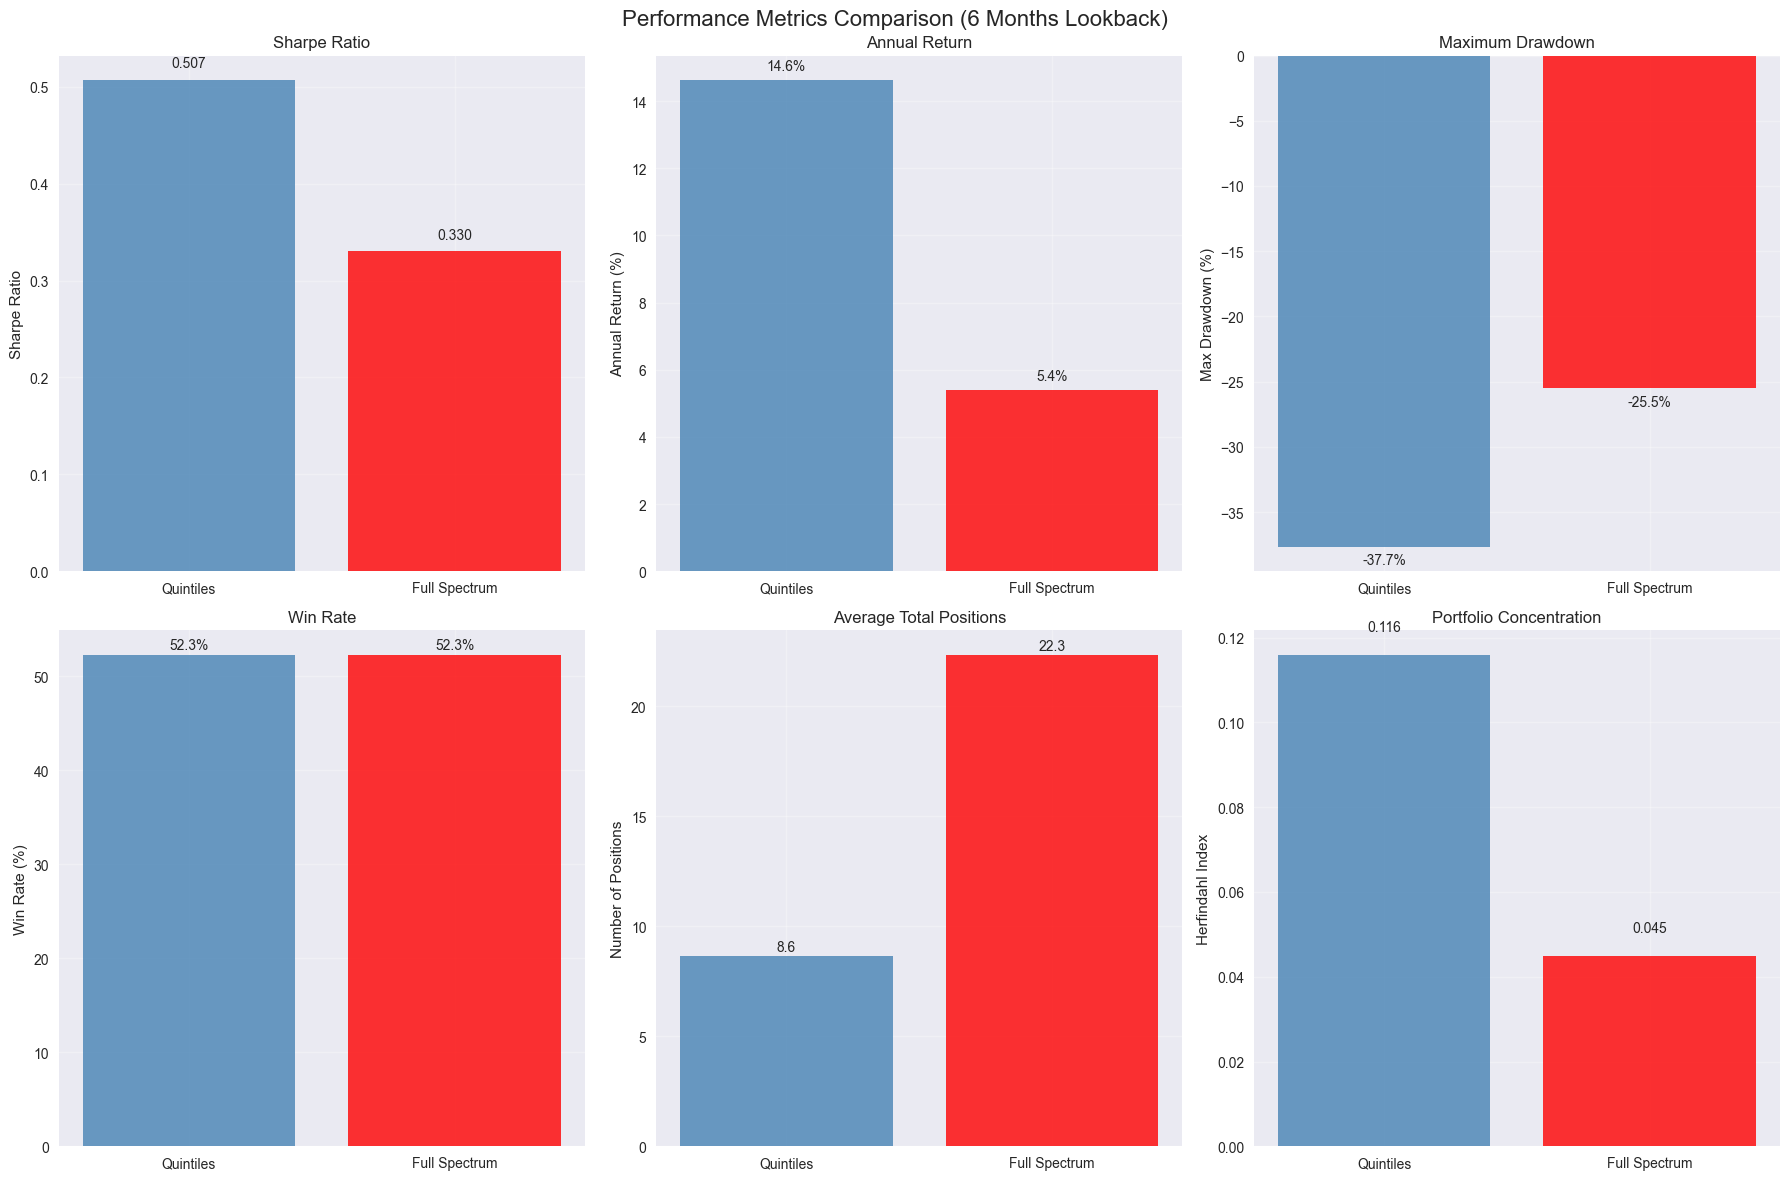

In [6]:
# Create comprehensive comparison visualizations
create_comparison_visualizations(
    results_dict, 
    metrics_dict, 
    positions_analysis,
    LOOKBACK_MONTHS
)

## 5. Return Distribution Analysis

Analyzing the distribution characteristics of monthly returns for both strategies.

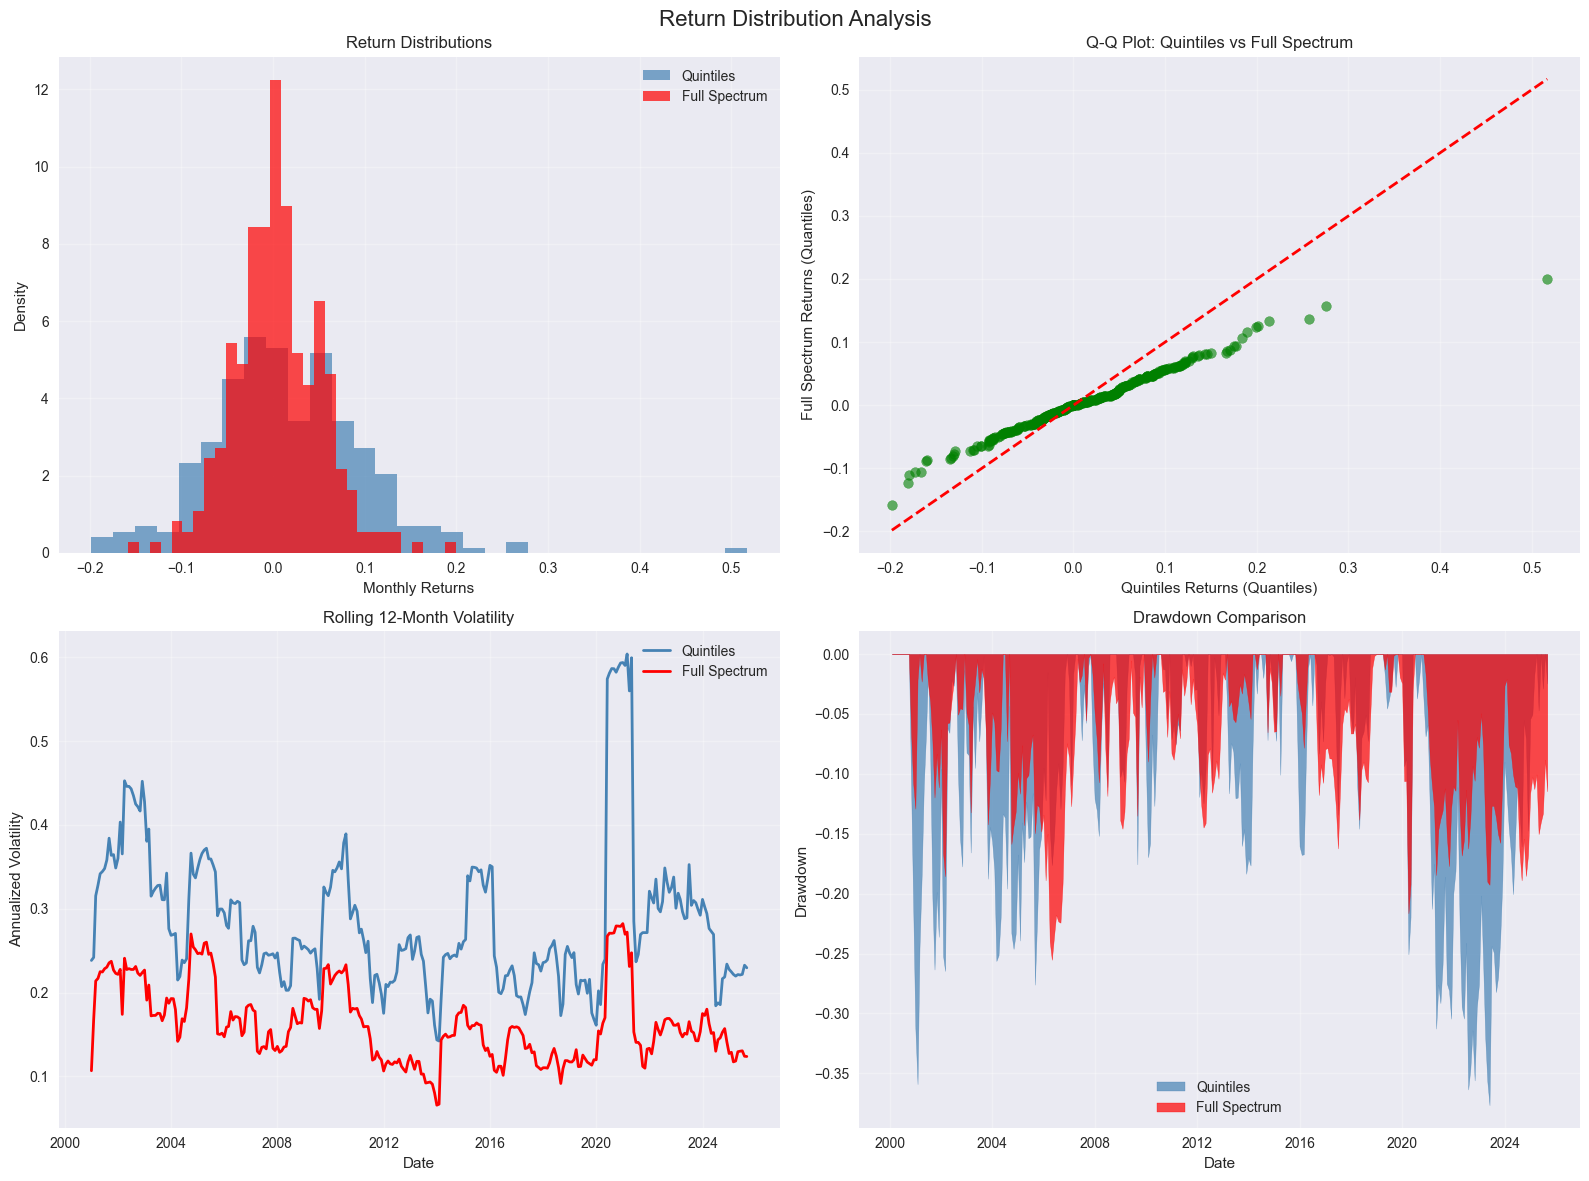


RETURN STATISTICS SUMMARY
          Quintiles  Full Spectrum
Mean         0.0148         0.0055
Std Dev      0.0833         0.0472
Skewness     0.8290         0.2714
Kurtosis     3.9448         1.2783
Min         -0.1982        -0.1585
Max          0.5169         0.1995


In [7]:
# Return distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Return Distribution Analysis', fontsize=16)

# Get clean returns
quintiles_returns = results_dict['quintiles']['strategy_returns'].dropna()
full_returns = results_dict['full_spectrum']['strategy_returns'].dropna()

# Histograms
axes[0,0].hist(quintiles_returns, bins=30, alpha=0.7, color='steelblue', label='Quintiles', density=True)
axes[0,0].hist(full_returns, bins=30, alpha=0.7, color='red', label='Full Spectrum', density=True)
axes[0,0].set_title('Return Distributions')
axes[0,0].set_xlabel('Monthly Returns')
axes[0,0].set_ylabel('Density')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Q-Q plot comparison
from scipy import stats
quintiles_sorted = np.sort(quintiles_returns)
full_sorted = np.sort(full_returns)

# Make same length for comparison
min_len = min(len(quintiles_sorted), len(full_sorted))
quintiles_qq = quintiles_sorted[-min_len:]
full_qq = full_sorted[-min_len:]

axes[0,1].scatter(quintiles_qq, full_qq, alpha=0.6, color='green')
axes[0,1].plot([min(quintiles_qq), max(quintiles_qq)], [min(quintiles_qq), max(quintiles_qq)], 'r--', lw=2)
axes[0,1].set_title('Q-Q Plot: Quintiles vs Full Spectrum')
axes[0,1].set_xlabel('Quintiles Returns (Quantiles)')
axes[0,1].set_ylabel('Full Spectrum Returns (Quantiles)')
axes[0,1].grid(True, alpha=0.3)

# Rolling volatility
rolling_vol_q = quintiles_returns.rolling(window=12).std() * np.sqrt(12)
rolling_vol_f = full_returns.rolling(window=12).std() * np.sqrt(12)

axes[1,0].plot(rolling_vol_q.index, rolling_vol_q, color='steelblue', linewidth=2, label='Quintiles')
axes[1,0].plot(rolling_vol_f.index, rolling_vol_f, color='red', linewidth=2, label='Full Spectrum')
axes[1,0].set_title('Rolling 12-Month Volatility')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Annualized Volatility')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Drawdown comparison
def calculate_drawdown(cumulative_returns):
    running_max = cumulative_returns.expanding().max()
    return (cumulative_returns - running_max) / running_max

dd_quintiles = calculate_drawdown(results_dict['quintiles']['cumulative_returns'])
dd_full = calculate_drawdown(results_dict['full_spectrum']['cumulative_returns'])

axes[1,1].fill_between(dd_quintiles.index, dd_quintiles, 0, alpha=0.7, color='steelblue', label='Quintiles')
axes[1,1].fill_between(dd_full.index, dd_full, 0, alpha=0.7, color='red', label='Full Spectrum')
axes[1,1].set_title('Drawdown Comparison')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Drawdown')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Return statistics summary
print("\nRETURN STATISTICS SUMMARY")
print("="*50)
stats_df = pd.DataFrame({
    'Quintiles': [
        quintiles_returns.mean(),
        quintiles_returns.std(),
        quintiles_returns.skew(),
        quintiles_returns.kurtosis(),
        quintiles_returns.min(),
        quintiles_returns.max()
    ],
    'Full Spectrum': [
        full_returns.mean(),
        full_returns.std(),
        full_returns.skew(),
        full_returns.kurtosis(),
        full_returns.min(),
        full_returns.max()
    ]
}, index=['Mean', 'Std Dev', 'Skewness', 'Kurtosis', 'Min', 'Max'])

print(stats_df.round(4))

## 6. Position Analysis

Analyzing portfolio composition and position characteristics over time.

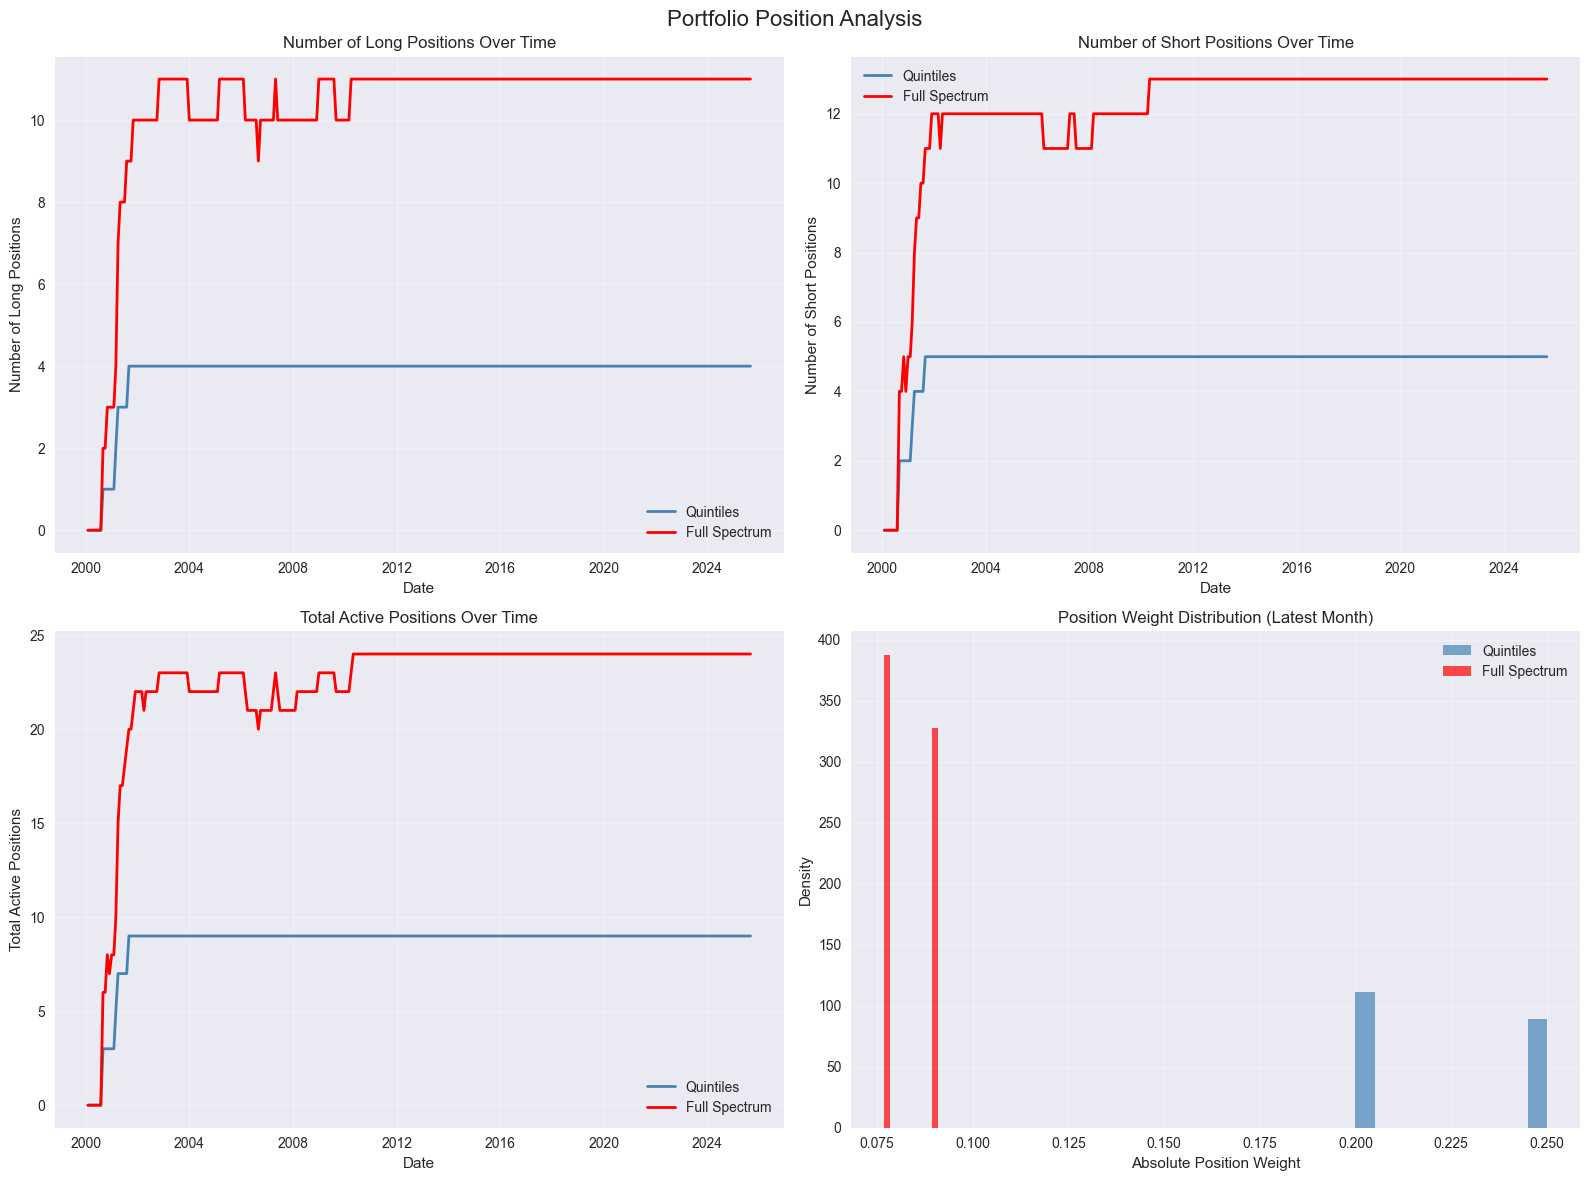


POSITION STATISTICS
Average Long Positions:
  Quintiles: 3.8
  Full Spectrum: 10.3

Average Short Positions:
  Quintiles: 4.8
  Full Spectrum: 12.0

Average Total Active Positions:
  Quintiles: 8.6
  Full Spectrum: 22.3

Portfolio Utilization:
  Quintiles: 36.0%
  Full Spectrum: 93.0%


In [8]:
# Get position data for analysis
from monthly_strategy_comparison import contrarian_quintiles_strategy, contrarian_full_spectrum_strategy

# Re-run to get positions
_, quintiles_positions = contrarian_quintiles_strategy(monthly_prices, LOOKBACK_MONTHS)
_, full_positions = contrarian_full_spectrum_strategy(monthly_prices, LOOKBACK_MONTHS)

# Position count analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Portfolio Position Analysis', fontsize=16)

# Long positions over time
quintiles_long_count = (quintiles_positions > 0).sum(axis=1)
full_long_count = (full_positions > 0).sum(axis=1)

axes[0,0].plot(quintiles_long_count.index, quintiles_long_count, color='steelblue', linewidth=2, label='Quintiles')
axes[0,0].plot(full_long_count.index, full_long_count, color='red', linewidth=2, label='Full Spectrum')
axes[0,0].set_title('Number of Long Positions Over Time')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Number of Long Positions')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Short positions over time
quintiles_short_count = (quintiles_positions < 0).sum(axis=1)
full_short_count = (full_positions < 0).sum(axis=1)

axes[0,1].plot(quintiles_short_count.index, quintiles_short_count, color='steelblue', linewidth=2, label='Quintiles')
axes[0,1].plot(full_short_count.index, full_short_count, color='red', linewidth=2, label='Full Spectrum')
axes[0,1].set_title('Number of Short Positions Over Time')
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Number of Short Positions')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Total active positions
quintiles_total = quintiles_long_count + quintiles_short_count
full_total = full_long_count + full_short_count

axes[1,0].plot(quintiles_total.index, quintiles_total, color='steelblue', linewidth=2, label='Quintiles')
axes[1,0].plot(full_total.index, full_total, color='red', linewidth=2, label='Full Spectrum')
axes[1,0].set_title('Total Active Positions Over Time')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Total Active Positions')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Position weight distribution (current month)
current_quintiles = quintiles_positions.iloc[-1][quintiles_positions.iloc[-1] != 0]
current_full = full_positions.iloc[-1][full_positions.iloc[-1] != 0]

axes[1,1].hist(current_quintiles.abs(), bins=10, alpha=0.7, color='steelblue', label='Quintiles', density=True)
axes[1,1].hist(current_full.abs(), bins=10, alpha=0.7, color='red', label='Full Spectrum', density=True)
axes[1,1].set_title(f'Position Weight Distribution (Latest Month)')
axes[1,1].set_xlabel('Absolute Position Weight')
axes[1,1].set_ylabel('Density')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Position statistics
print("\nPOSITION STATISTICS")
print("="*40)
print(f"Average Long Positions:")
print(f"  Quintiles: {quintiles_long_count.mean():.1f}")
print(f"  Full Spectrum: {full_long_count.mean():.1f}")

print(f"\nAverage Short Positions:")
print(f"  Quintiles: {quintiles_short_count.mean():.1f}")
print(f"  Full Spectrum: {full_short_count.mean():.1f}")

print(f"\nAverage Total Active Positions:")
print(f"  Quintiles: {quintiles_total.mean():.1f}")
print(f"  Full Spectrum: {full_total.mean():.1f}")

print(f"\nPortfolio Utilization:")
total_commodities = len(monthly_prices.columns)
print(f"  Quintiles: {(quintiles_total.mean() / total_commodities):.1%}")
print(f"  Full Spectrum: {(full_total.mean() / total_commodities):.1%}")

## 7. Detailed Performance Table

Comprehensive side-by-side comparison of all metrics.

In [9]:
# Print detailed comparison table
print_detailed_comparison_table(metrics_dict, positions_analysis)


DETAILED STRATEGY COMPARISON
Metric                    Quintiles            Full Spectrum        Difference      Winner    
----------------------------------------------------------------------------------------------------
Total Return              3223.0%              285.3%               -2937.7%        Quintiles 
Annual Return             14.6%                5.4%                 -9.2%           Quintiles 
Annual Volatility         28.9%                16.3%                -12.5%          Full Spectrum
Sharpe Ratio              0.507                0.330                -0.177          Quintiles 
Max Drawdown              -37.7%               -25.5%               12.1%           Quintiles 
Win Rate                  52.3%                52.3%                0.0%            Full Spectrum
Profit Factor             1.606                1.363                -0.243          Quintiles 
Skewness                  0.829                0.271                -0.558          Quintiles 
Kurtosis

## 8. Key Findings and Conclusions

Summary of the comparison analysis and strategic insights.

In [10]:
# Calculate key differences and insights
sharpe_diff = metrics_dict['full_spectrum']['sharpe_ratio'] - metrics_dict['quintiles']['sharpe_ratio']
return_diff = metrics_dict['full_spectrum']['annual_return'] - metrics_dict['quintiles']['annual_return']
vol_diff = metrics_dict['full_spectrum']['annual_volatility'] - metrics_dict['quintiles']['annual_volatility']
dd_diff = metrics_dict['full_spectrum']['max_drawdown'] - metrics_dict['quintiles']['max_drawdown']

position_diff = positions_analysis['full_spectrum']['avg_total_positions'] - positions_analysis['quintiles']['avg_total_positions']
concentration_diff = positions_analysis['full_spectrum']['avg_concentration'] - positions_analysis['quintiles']['avg_concentration']

print("KEY FINDINGS AND INSIGHTS")
print("="*60)

print(f"\n📊 PERFORMANCE DIFFERENCES:")
print(f"   Sharpe Ratio: {sharpe_diff:+.3f} ({sharpe_diff/abs(metrics_dict['quintiles']['sharpe_ratio']):+.1%})")
print(f"   Annual Return: {return_diff:+.1%}")
print(f"   Annual Volatility: {vol_diff:+.1%}")
print(f"   Max Drawdown: {dd_diff:+.1%}")

print(f"\n🎯 PORTFOLIO CHARACTERISTICS:")
print(f"   Position Count Difference: {position_diff:+.1f} positions")
print(f"   Concentration Difference: {concentration_diff:+.3f}")

print(f"\n💡 STRATEGIC INSIGHTS:")

# Determine which strategy is better overall
quintiles_score = 0
full_score = 0

# Score based on key metrics (Sharpe ratio gets double weight)
if metrics_dict['quintiles']['sharpe_ratio'] > metrics_dict['full_spectrum']['sharpe_ratio']:
    quintiles_score += 2
    print(f"   ✓ Quintiles strategy has superior risk-adjusted returns")
else:
    full_score += 2
    print(f"   ✓ Full spectrum strategy has superior risk-adjusted returns")

if metrics_dict['quintiles']['annual_return'] > metrics_dict['full_spectrum']['annual_return']:
    quintiles_score += 1
    print(f"   ✓ Quintiles strategy has higher absolute returns")
else:
    full_score += 1
    print(f"   ✓ Full spectrum strategy has higher absolute returns")

if abs(metrics_dict['quintiles']['max_drawdown']) < abs(metrics_dict['full_spectrum']['max_drawdown']):
    quintiles_score += 1
    print(f"   ✓ Quintiles strategy has lower maximum drawdown")
else:
    full_score += 1
    print(f"   ✓ Full spectrum strategy has lower maximum drawdown")

# Diversification analysis
print(f"\n🔄 DIVERSIFICATION ANALYSIS:")
print(f"   Quintiles uses {positions_analysis['quintiles']['avg_total_positions']:.1f} positions on average")
print(f"   Full spectrum uses {positions_analysis['full_spectrum']['avg_total_positions']:.1f} positions on average")
print(f"   Portfolio utilization: {(positions_analysis['full_spectrum']['avg_total_positions']/total_commodities):.1%} vs {(positions_analysis['quintiles']['avg_total_positions']/total_commodities):.1%}")

# Final recommendation
print(f"\n🏆 OVERALL RECOMMENDATION:")
if quintiles_score > full_score:
    print(f"   WINNER: Quintiles Strategy (Score: {quintiles_score} vs {full_score})")
    print(f"   The traditional approach of focusing on extreme performers appears more effective")
    print(f"   for this commodity universe and timeframe.")
elif full_score > quintiles_score:
    print(f"   WINNER: Full Spectrum Strategy (Score: {full_score} vs {quintiles_score})")
    print(f"   Using all available information (50/50 split) provides better performance")
    print(f"   through increased diversification and broader market exposure.")
else:
    print(f"   TIE: Both strategies show similar overall performance (Score: {quintiles_score} vs {full_score})")
    print(f"   Choice depends on investor preferences for concentration vs diversification.")

print(f"\n📈 PRACTICAL IMPLICATIONS:")
print(f"   • Full spectrum strategy requires {positions_analysis['full_spectrum']['avg_total_positions']/positions_analysis['quintiles']['avg_total_positions']:.1f}x more positions")
print(f"   • Transaction costs will be higher for full spectrum approach")
print(f"   • Full spectrum provides better diversification but potentially diluted signals")
print(f"   • Quintiles approach concentrates on strongest signals but may miss opportunities")

print("\n" + "="*60)

KEY FINDINGS AND INSIGHTS

📊 PERFORMANCE DIFFERENCES:
   Sharpe Ratio: -0.177 (-34.9%)
   Annual Return: -9.2%
   Annual Volatility: -12.5%
   Max Drawdown: +12.1%

🎯 PORTFOLIO CHARACTERISTICS:
   Position Count Difference: +13.7 positions
   Concentration Difference: -0.071

💡 STRATEGIC INSIGHTS:
   ✓ Quintiles strategy has superior risk-adjusted returns
   ✓ Quintiles strategy has higher absolute returns
   ✓ Full spectrum strategy has lower maximum drawdown

🔄 DIVERSIFICATION ANALYSIS:
   Quintiles uses 8.6 positions on average
   Full spectrum uses 22.3 positions on average
   Portfolio utilization: 93.0% vs 36.0%

🏆 OVERALL RECOMMENDATION:
   WINNER: Quintiles Strategy (Score: 3 vs 1)
   The traditional approach of focusing on extreme performers appears more effective
   for this commodity universe and timeframe.

📈 PRACTICAL IMPLICATIONS:
   • Full spectrum strategy requires 2.6x more positions
   • Transaction costs will be higher for full spectrum approach
   • Full spectrum pr

## 9. Save Results

Save comparison results for future reference.

In [11]:
# Save comparison results
results_dir = '../data/comparison_results'
os.makedirs(results_dir, exist_ok=True)

# Save equity curves
comparison_results = pd.DataFrame({
    'quintiles_returns': results_dict['quintiles']['strategy_returns'],
    'quintiles_cumulative': results_dict['quintiles']['cumulative_returns'],
    'full_spectrum_returns': results_dict['full_spectrum']['strategy_returns'],
    'full_spectrum_cumulative': results_dict['full_spectrum']['cumulative_returns']
})

comparison_results.to_csv(f'{results_dir}/quintiles_vs_full_spectrum_results.csv')
print(f"✓ Saved equity curves to: {results_dir}/quintiles_vs_full_spectrum_results.csv")

# Save performance metrics
metrics_comparison = pd.DataFrame({
    'Quintiles': [v for v in metrics_dict['quintiles'].values()],
    'Full_Spectrum': [v for v in metrics_dict['full_spectrum'].values()]
}, index=list(metrics_dict['quintiles'].keys()))

metrics_comparison.to_csv(f'{results_dir}/performance_metrics_comparison.csv')
print(f"✓ Saved performance metrics to: {results_dir}/performance_metrics_comparison.csv")

# Save position analysis
positions_comparison = pd.DataFrame({
    'Quintiles': [v for v in positions_analysis['quintiles'].values()],
    'Full_Spectrum': [v for v in positions_analysis['full_spectrum'].values()]
}, index=list(positions_analysis['quintiles'].keys()))

positions_comparison.to_csv(f'{results_dir}/positions_analysis_comparison.csv')
print(f"✓ Saved position analysis to: {results_dir}/positions_analysis_comparison.csv")

print(f"\n✓ All comparison results saved to: {results_dir}/")
print(f"Analysis complete! 🎉")

✓ Saved equity curves to: ../data/comparison_results/quintiles_vs_full_spectrum_results.csv
✓ Saved performance metrics to: ../data/comparison_results/performance_metrics_comparison.csv
✓ Saved position analysis to: ../data/comparison_results/positions_analysis_comparison.csv

✓ All comparison results saved to: ../data/comparison_results/
Analysis complete! 🎉
